 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [34]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
file_path=Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(file_path, index_col="Date",infer_datetime_format=True,parse_dates=True)
whale_returns=whale_returns.sort_index()
whale_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:



# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [35]:
# Reading algorithmic returns
file_path2= Path("Resources/algo_returns.csv")
algo_returns= pd.read_csv(file_path2,index_col="Date",infer_datetime_format=True,parse_dates=True)
algo_returns=algo_returns.sort_index()
algo_returns.dropna(inplace=True)
algo_returns.head()


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [7]:
# Count nulls
algo_returns.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_history=Path("Resources/sp500_history.csv")
sp500_history= pd.read_csv(sp500_history,index_col="Date",infer_datetime_format=True,parse_dates=True)
sp500_history =sp500_history.sort_index()
sp500_history.head()


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Check Data Types
sp500_history.dtypes


Close    object
dtype: object

In [11]:
# Fix Data Types
sp500_history["Close"]= sp500_history["Close"].str.replace("$","")
sp500_history["Close"]= sp500_history["Close"].astype("float")
sp500_history["Close"]


Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
2012-10-08    1455.88
2012-10-09    1441.48
2012-10-10    1432.56
2012-10-11    1432.84
2012-10-12    1428.59
2012-10-15    1440.13
2012-10-16    1454.92
2012-10-17    1460.91
2012-10-18    1457.34
2012-10-19    1433.19
2012-10-22    1433.82
2012-10-23    1413.11
2012-10-24    1408.75
2012-10-25    1412.97
2012-10-26    1411.94
2012-10-31    1412.16
2012-11-01    1427.59
2012-11-02    1414.20
2012-11-05    1417.26
2012-11-06    1428.39
2012-11-07    1394.53
2012-11-08    1377.51
2012-11-09    1379.85
2012-11-12    1380.03
2012-11-13    1374.53
               ...   
2019-03-12    2791.52
2019-03-13    2810.92
2019-03-14    2808.48
2019-03-15    2822.48
2019-03-18    2832.94
2019-03-19    2832.57
2019-03-20    2824.23
2019-03-21    2854.88
2019-03-22    2800.71
2019-03-25    2798.36
2019-03-26    2818.46
2019-03-27    2805.37
2019-03-28    2815.44
2019-03-29    2834.40
2019-

In [36]:
# Calculate Daily Returns
sp500_returns = sp500_history.pct_change()
sp500_returns.dropna(inplace=True)
sp500_returns.head()



,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [37]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_returns.rename(columns={"Close":"S&P500"})
sp500_returns.head()




,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolios = pd.concat([whale_returns,algo_returns,sp500_returns],axis="columns",join="inner")


all_portfolios.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

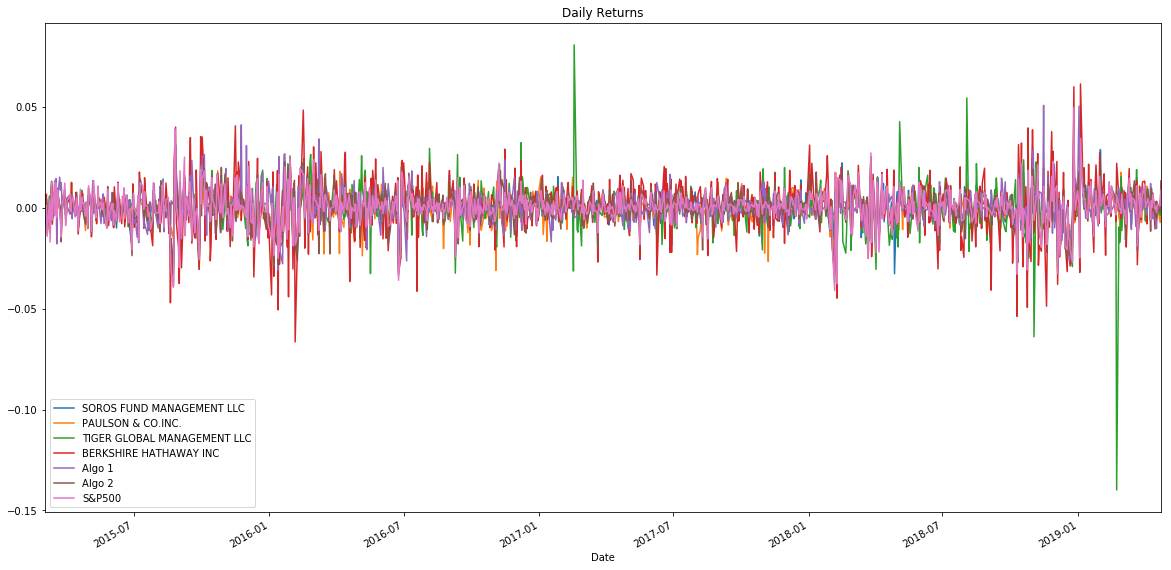

In [20]:
# Plot daily returns of all portfolios
all_portfolios.plot(figsize=(20,10),title="Daily Returns")


#### Calculate and Plot cumulative returns.

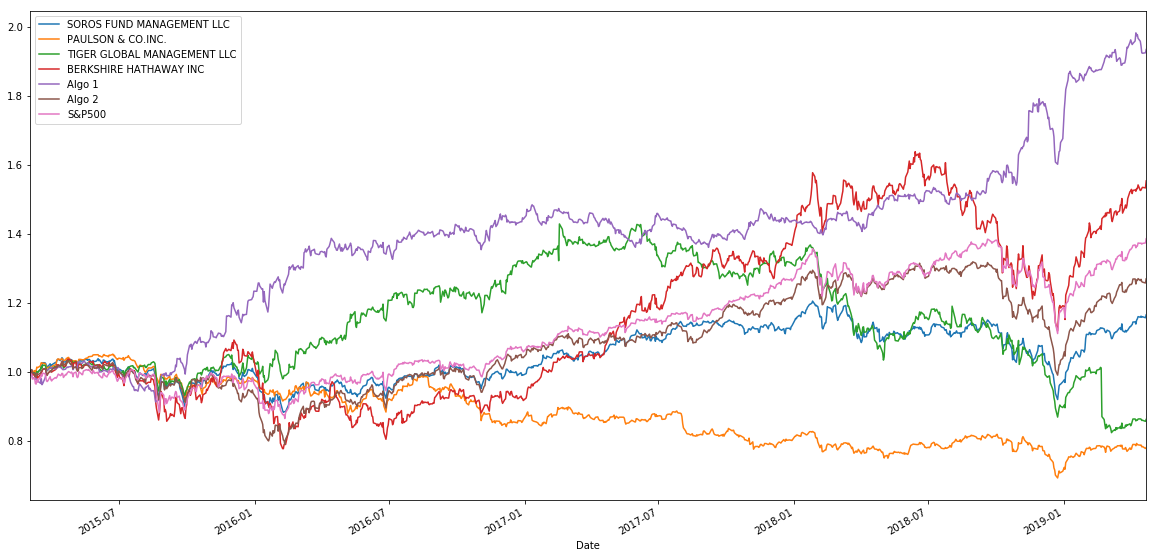

In [21]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_portfolios).cumprod() 
cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))




---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


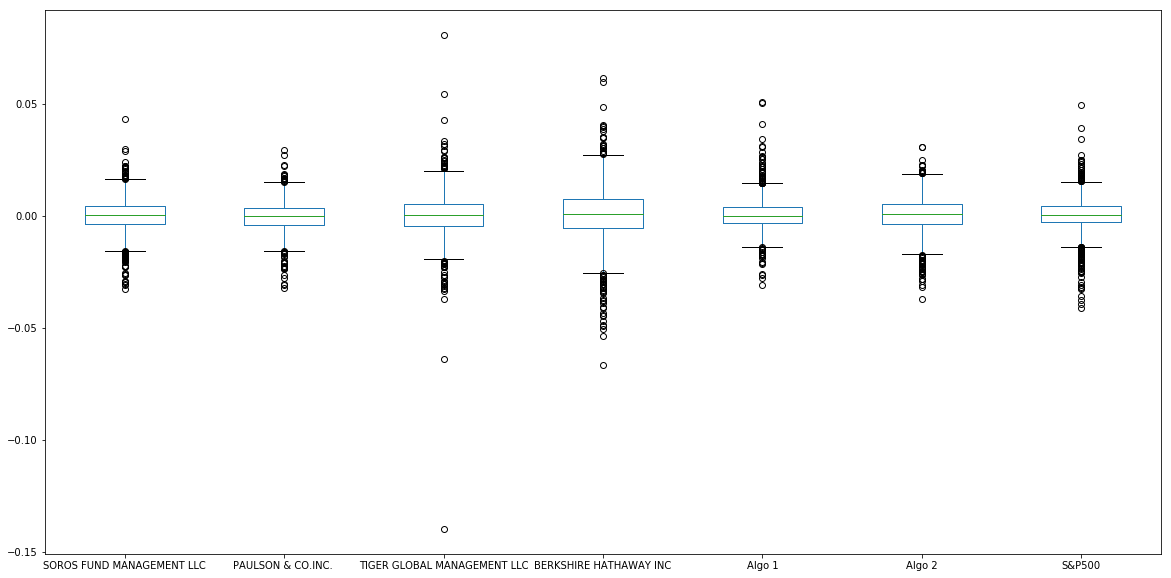

In [38]:
# Box plot to visually show risk
all_portfolios.plot.box(figsize=(20,10))


### Calculate Standard Deviations

In [22]:
# Calculate the daily standard deviations of all portfolios
volatility = all_portfolios.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility


PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P500                         0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [23]:
# Calculate  the daily standard deviation of S&P 500
volatility_sp500 = sp500_returns.std() *np.sqrt(252)
volatility_sp500.sort_values(inplace=True)
volatility_sp500



S&P500    0.128762
dtype: float64

In [21]:
# Determine which portfolios are riskier than the S&P 500
volatility_whale_returns = whale_returns.std() *np.sqrt(252)
volatility_whale_returns


SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [22]:
volatility_algo_returns = algo_returns.std() *np.sqrt(252)
volatility_algo_returns

Algo 1    0.126801
Algo 2    0.134401
dtype: float64

### Calculate the Annualized Standard Deviation

In [29]:
# Calculate the annualized standard deviation (252 trading days)
whale_returns.rolling(window=252).std()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [129]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
whale_returns.rolling(window=21).std()
whale_returns.head()







,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [132]:
algo_returns.rolling(window=21).std()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [134]:
sp500_returns.rolling(window=21).std()
sp500_returns.head()

,S&P500
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


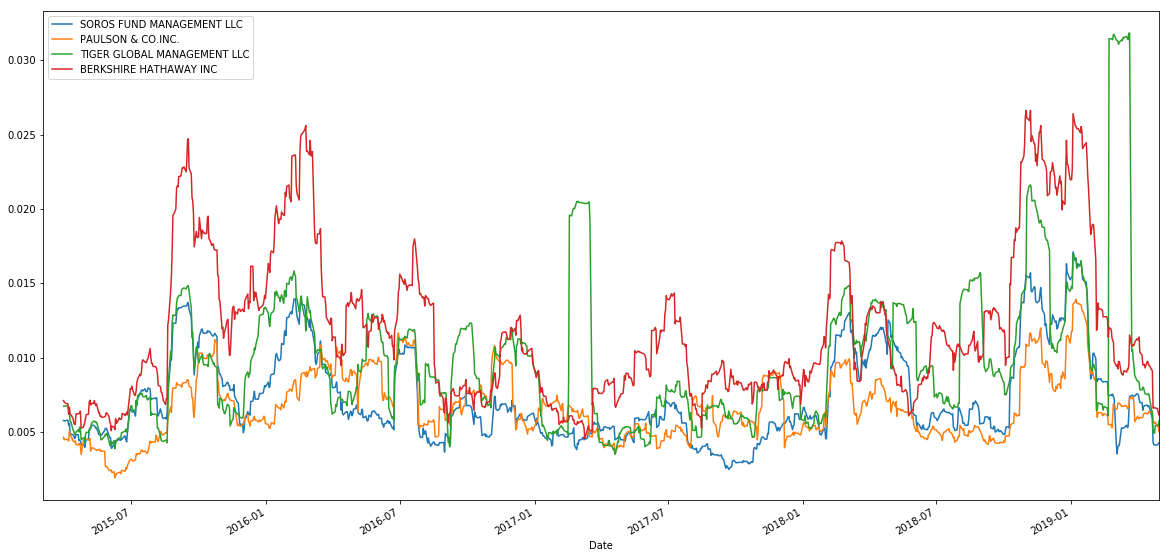

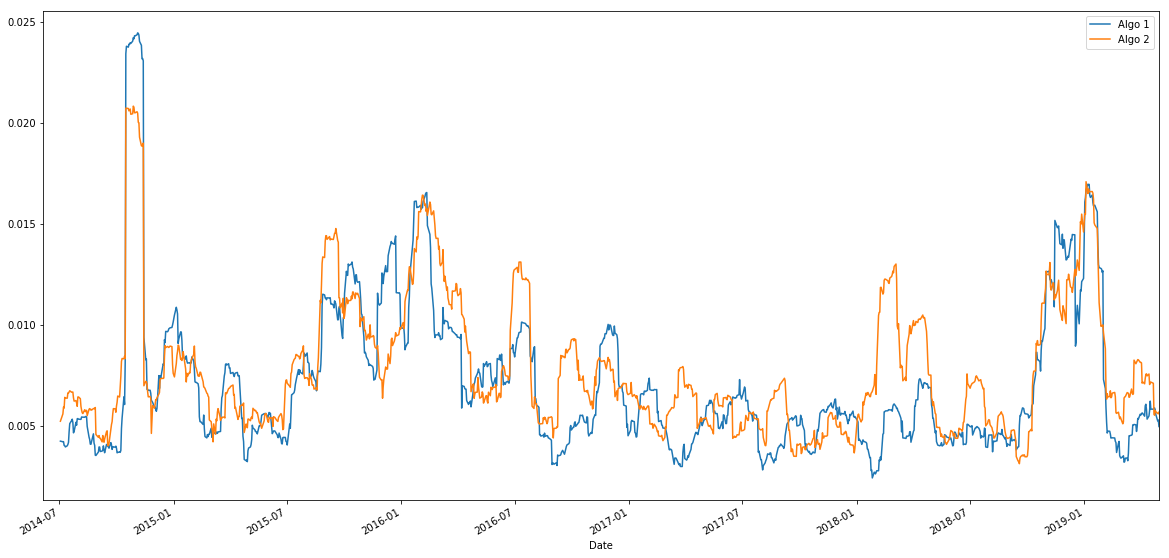

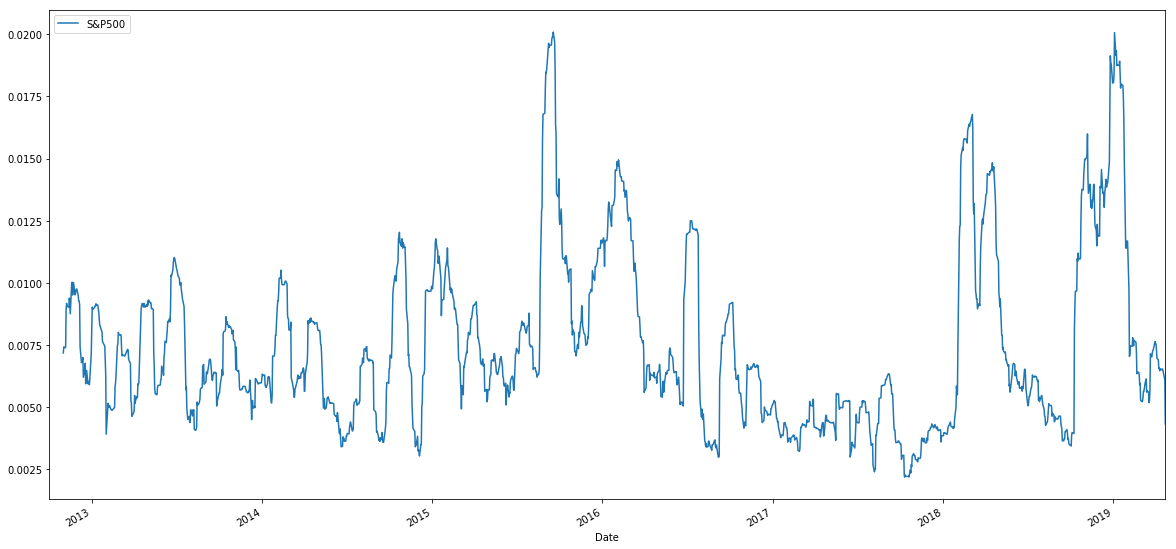

In [39]:
#Plot the rolling standard deviation
whale_returns.rolling(window=21).std().plot(figsize=(20,10))
algo_returns.rolling(window=21).std().plot(figsize=(20,10))
sp500_returns.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

In [40]:
# Calculate the correlation
correlation = all_portfolios.corr()

# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

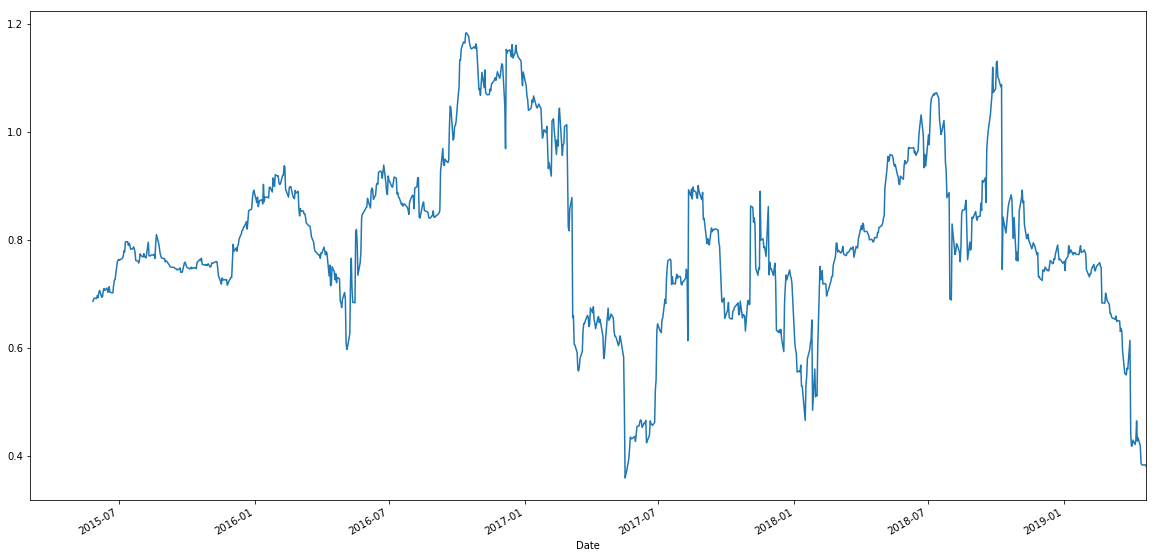

In [44]:
# Calculate covariance of a single portfolio
covariance= all_portfolios["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(all_portfolios["S&P500"])

# Calculate variance of S&P 500
variance= all_portfolios["S&P500"].rolling(window=60).var()


# Computing beta
beta = covariance/variance


# Plot beta trend
beta.plot(figsize=(20,10))


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

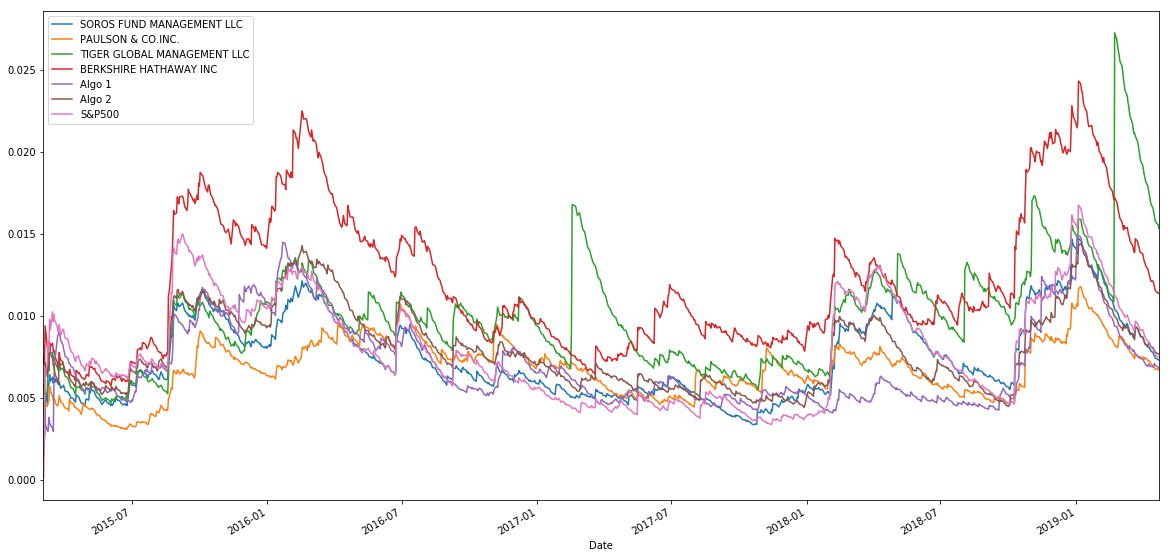

In [46]:
# Use `ewm` to calculate the rolling window
ewm = all_portfolios.ewm(halflife=21).std()
ewm.plot(figsize=(20,10))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [48]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_portfolios.mean()*252)/(all_portfolios.std()* np.sqrt(252))


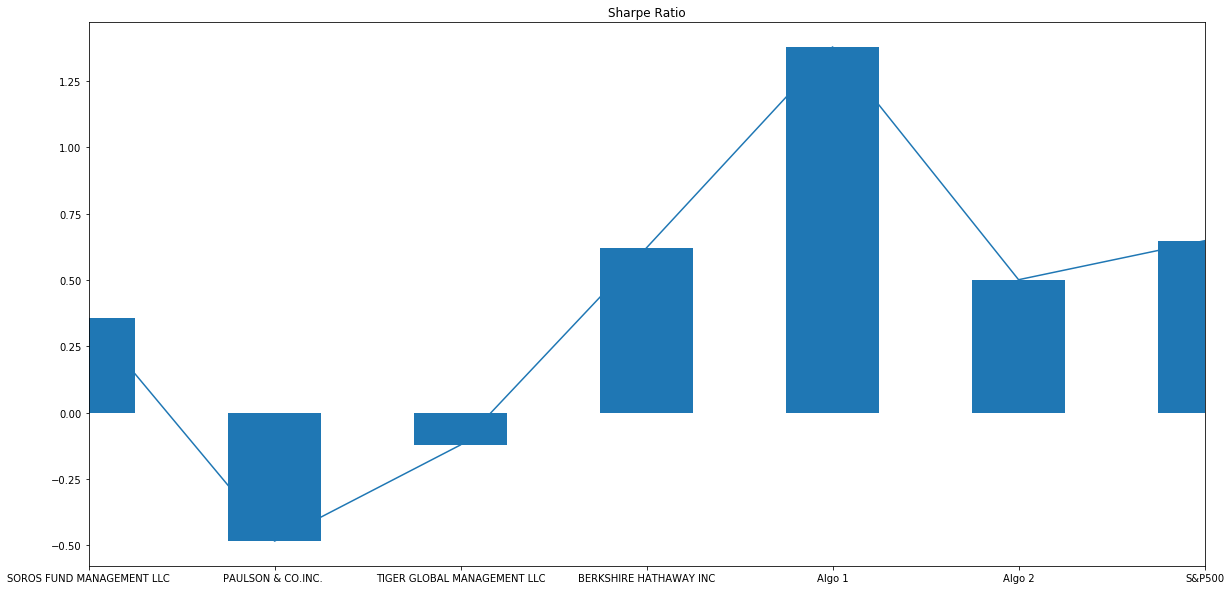

In [50]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title= "Sharpe Ratio")
sharpe_ratios.plot(figsize=(20,10))


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [52]:
#Algo 1 has the least amount of risk. Algo 2 is similar to whale_returns and sp500_returns. Threefore, overall algo outperform.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [53]:
# Reading data from 1st stock
file_path=Path("Resources/goog_historical.csv")
goog_returns = pd.read_csv(file_path,index_col="Trade DATE",infer_datetime_format=True,parse_dates=True)
goog_returns.head()


,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [55]:
# Reading data from 2nd stock
file_path=Path("Resources/aapl_historical.csv")
aapl_history= pd.read_csv(file_path,index_col="Trade DATE",infer_datetime_format=True,parse_dates=True)
aapl_history.head()


,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [56]:
# Reading data from 3rd stock
file_path=Path("Resources/cost_historical.csv")
cost_history= pd.read_csv(file_path,index_col="Trade DATE",infer_datetime_format=True,parse_dates=True)
cost_history.head()


,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [83]:
# Combine all stocks in a single DataFrame
bluechip_df= pd.concat([goog_returns,aapl_history,cost_history],axis="rows",join="inner")
bluechip_df.head()


,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [84]:
# Reset Date index

reset_bluechip_df = bluechip_df.reset_index()
reset_bluechip_df.head()


,Trade DATE,Symbol,NOCP
0,2019-05-09,GOOG,1162.38
1,2019-05-08,GOOG,1166.27
2,2019-05-07,GOOG,1174.10
3,2019-05-06,GOOG,1189.39
4,2019-05-03,GOOG,1185.40


In [85]:
# Reorganize portfolio data by having a column per symbol
reorganize_df= reset_bluechip_df.pivot_table(values="NOCP",index="Trade DATE",columns="Symbol")
reorganize_df.head()

#pivot_table--> what you want to use in values, what you want to use in your index, what you want to use in your columns



Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [86]:
# Calculate daily returns
daily_returns = reorganize_df.pct_change()
daily_returns.head()

# Drop NAs
daily_returns.dropna(inplace=True)

# Display sample data
daily_returns.head()


Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [87]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
bluechip_returns = daily_returns.dot(weights)

# Display sample data
bluechip_returns.head()


Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [99]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolios["custom"] = bluechip_returns
all_portfolios.dropna(inplace=True)

all_portfolios.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,custom
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [100]:
# Calculate the annualized `std`
risk = all_portfolios.std()* np.sqrt(252)
risk


SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P500                         0.152054
custom                         0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

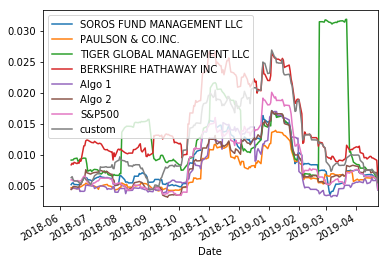

In [102]:
# Calculate rolling standard deviation
rolling= all_portfolios.rolling(window=21).std()

# Plot rolling standard deviation
rolling.plot()


### Calculate and plot the correlation

In [103]:
# Calculate and plot the correlation
corr = all_portfolios.corr()
all_portfolios


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,custom
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
2018-05-21,0.002503,-0.001195,-0.001153,0.010370,-0.003092,0.004924,0.007387,0.007600
2018-05-22,-0.002345,0.001168,-0.000240,-0.002455,0.011234,-0.005628,-0.003136,-0.004962
2018-05-23,-0.000899,-0.000659,0.005062,0.011108,-0.002093,0.001962,0.003248,0.003850
2018-05-24,-0.002160,-0.002229,0.000880,0.002245,0.001075,-0.001121,-0.002023,0.000751


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

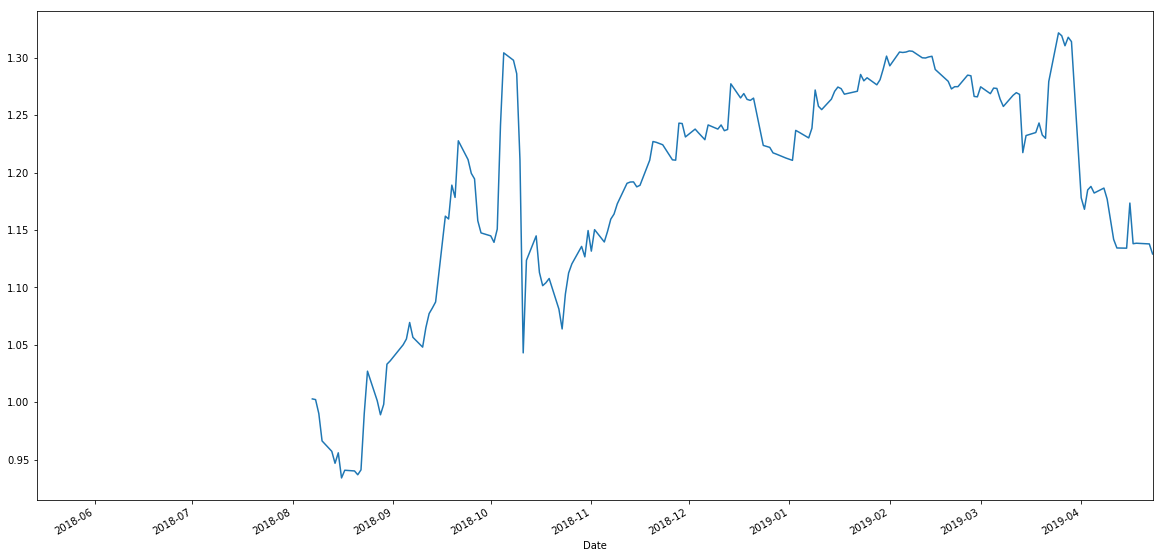

In [106]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
covariance= all_portfolios["custom"].rolling(window=60).cov(all_portfolios["S&P500"])

# Calculate variance of S&P 500
variance= all_portfolios["S&P500"].rolling(window=60).var()


# Computing beta
beta2 = covariance/variance


# Plot beta trend
beta2.plot(figsize=(20,10))



### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [110]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios_bluechip = (all_portfolios.mean()*252)/(all_portfolios.std()*np.sqrt(252))
sharpe_ratios_bluechip


SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P500                         0.584820
custom                         0.933123
dtype: float64

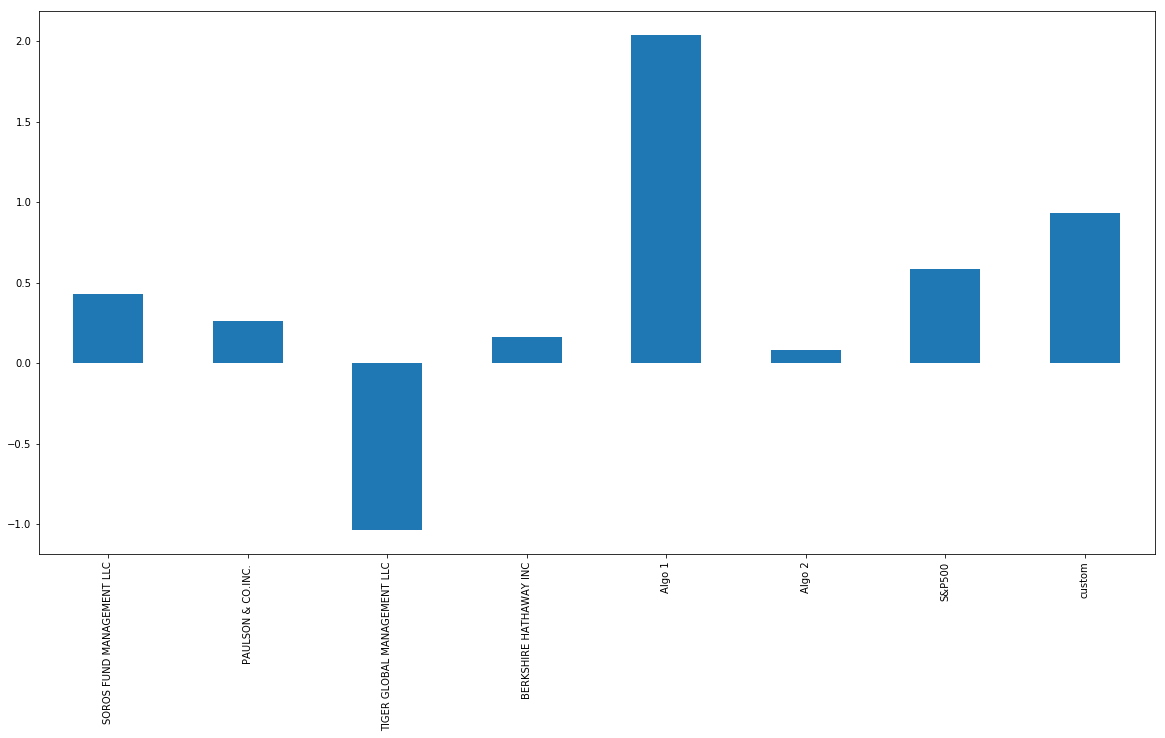

In [113]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_bluechip.plot.bar(figsize=(20,10))

### How does your portfolio do?

Write your answer here!

In [ ]:
Better than most; algo1 is still top performer